In [1]:
# Import Libraries

# vector data
import geopandas as gpd
import pandas as pd

# raster data
import xarray as xr
import rioxarray as rxr

## maps and plotting
import holoviews as hv
import hvplot.pandas

## osm
import osmnx as ox
from osmnx import features as osm

## file structure
import os
import pathlib

## earthpy
import earthpy
import earthpy.api.appeears as eaapp

In [2]:
# define project



# choose just a folder *name*, not a full path
data_dir = "arctic-greening"

# this returns a Project with a Path-like project_dir
project = earthpy.project.Project(dirname=data_dir)

print(project.project_dir, type(project.project_dir))  # should be PosixPath


/workspaces/data/arctic-greening <class 'pathlib.PosixPath'>


In [3]:
# search for juneau icefield
juneau_gdf = ox.geocode_to_gdf('Juneau Ice Sheet')
juneau_gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-134.92667 59.12417, -134.92662 59.1...",-134.926673,58.356352,-133.793343,59.131667,349634157,relation,2051975,58.743988,-134.270183,natural,glacier,22,0.106724,glacier,Juneau Ice Sheet,"Juneau Ice Sheet, Alaska, United States"


<Axes: >

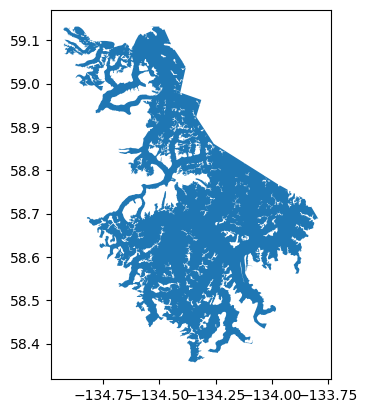

In [4]:
## make a quick plot
juneau_gdf.plot()

In [8]:
ndvi_downloader = eaapp.AppeearsDownloader(
    download_key="jirp_ndvi",
    project=project,
    product="MOD13Q1.061",
    layer="_250m_16_days_NDVI",
    start_date="06-01",
    end_date="06-30",
    recurring=True,
    year_range=[2001, 2001],
    polygon=juneau_gdf,   # or whatever your study-area gdf is
)


In [6]:
ndvi_downloader

In [9]:
ndvi_downloader.download_files(cache=True)

Credentials found using 'env' backend.


KeyboardInterrupt: 

In [10]:
# Save as GeoJSON
juneau_gdf.to_file("region.geojson", driver="GeoJSON")